In [1]:
# !pip install igraph # for directed graph
# import igraph as ig

In [2]:
# !pip install networkx
import networkx as nx

In [3]:
import numpy as np
import sys
sys.path.append('..')
import umbrella_mesh
import linkage_vis
import load_jsondata
from configuration import parse_input

In [4]:
from figure_2D import plot_undeployed_2D
from tools import get_center_position
import deploy_path as dp

In [5]:
def print_bumps_depressions(graph, bumps, depressions):
    print('\n--> bumps:')
    print(*[(b, graph.nodes[b]['height']) for b in bumps], sep='\n')
    print('\n--> depression:')
    print(*[(d, graph.nodes[d]['height']) for d in depressions], sep='\n')

### **Mesh Path**

In [6]:
from mesh_paths import  saddle_path,  igloo_coars_path, \
                        squid_path,   igloo_path,       \
                        peanut_path,  lilium_path,      \
                        hive_path,    trililium_path

In [7]:
mesh_path = hive_path

---

In [8]:
io, input_data, target_mesh, curr_um, plate_thickness_scaled, target_height_multiplier = parse_input(mesh_path, handleBoundary = False, isHex = False, use_target_surface = False)

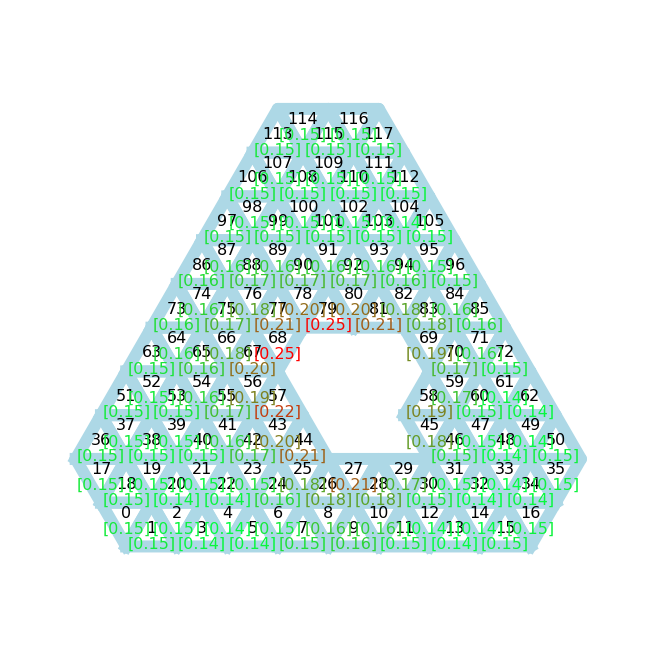

In [9]:
plot_undeployed_2D(input_data,
                   curr_um,
                   show_height=True,
                   show_plot=True)

In [10]:
connectivity = np.array(input_data['umbrella_connectivity'])
pos = get_center_position(curr_um)[:,:2]

In [11]:
graph = dp.create_graph(connectivity, curr_um)

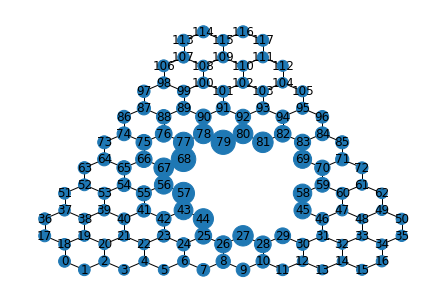

In [12]:
dp.draw_height(graph, pos, with_labels=True)

In [29]:
drop_extrems_at_boundary = False
drop_boudary             = True
bumps, depressions = dp.find_extrems(graph, drop_extrems_at_boundary=drop_extrems_at_boundary, drop_boudary=drop_boudary)

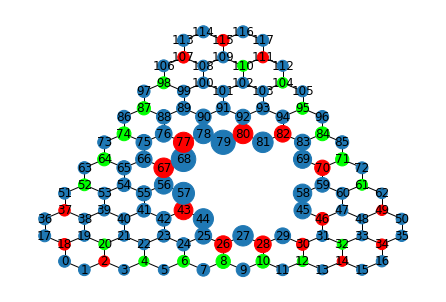


--> bumps:
(2, 0.14505739255714512)
(14, 0.1413534937124643)
(18, 0.14837472786855632)
(26, 0.18231103212571342)
(28, 0.18014676560058399)
(30, 0.15075746497627576)
(34, 0.14418814822471096)
(37, 0.14810865093265968)
(43, 0.19661716054196351)
(46, 0.1544320813300337)
(49, 0.1427380379684041)
(67, 0.20277967155682033)
(70, 0.1708214488463616)
(77, 0.2078763913138155)
(80, 0.20406517779260847)
(82, 0.17955332464793627)
(107, 0.1486434343548744)
(111, 0.1463440219235147)
(115, 0.1491536477692838)

--> depression:
(4, 0.14178130831533944)
(6, 0.14974852886721446)
(8, 0.16403108653092502)
(10, 0.16045877253504792)
(12, 0.14340443672403447)
(20, 0.14429612227834246)
(32, 0.1410544893113236)
(52, 0.14978804185077088)
(61, 0.14497874297393673)
(64, 0.15663539186412195)
(71, 0.15740449769875295)
(74, 0.1612039873602899)
(84, 0.16113127040258451)
(87, 0.15745612608397833)
(95, 0.15087576623960408)
(98, 0.15036257236488845)
(104, 0.1438239046064543)
(110, 0.14533474029411336)


In [30]:
# draw extrem points (bumps are red and depression are green)
dp.draw_height_extrems(graph, pos, bumps, depressions, with_labels=True)
print_bumps_depressions(graph, bumps, depressions)

In [31]:
paths = dp.shortes_paths(graph, bumps, depressions); paths

[[2, 20],
 [14, 32],
 [18, 19, 20],
 [26, 8],
 [28, 10],
 [30, 12],
 [34, 33, 32],
 [37, 51, 52],
 [43, 42, 23, 22, 4],
 [46, 31, 32],
 [49, 62, 61],
 [67, 66, 65, 64],
 [70, 71],
 [77, 76, 75, 74],
 [80, 81, 82, 83, 84],
 [82, 83, 84],
 [107, 106, 98],
 [111, 110],
 [115, 109, 110]]

In [32]:
# light_grey = 211/255
# colors_default = [(light_grey,light_grey,light_grey)] * len(graph) # light_grey

In [33]:
# raise NotImplementedError('stop `run all` here to select some depressions in next cell')

In [34]:
kept_depressions = depressions

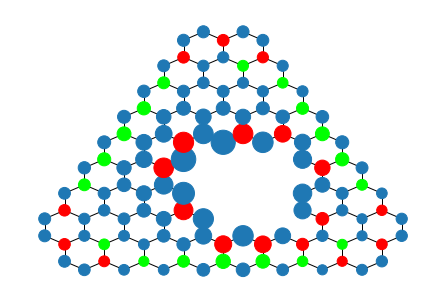

In [35]:
# draw extrem points (bumps are red and depression are green)
dp.draw_height_extrems(graph, pos, bumps, kept_depressions)

In [36]:
paths = dp.shortes_paths(graph, bumps, kept_depressions); paths

[[2, 20],
 [14, 32],
 [18, 19, 20],
 [26, 8],
 [28, 10],
 [30, 12],
 [34, 33, 32],
 [37, 51, 52],
 [43, 42, 23, 22, 4],
 [46, 31, 32],
 [49, 62, 61],
 [67, 66, 65, 64],
 [70, 71],
 [77, 76, 75, 74],
 [80, 81, 82, 83, 84],
 [82, 83, 84],
 [107, 106, 98],
 [111, 110],
 [115, 109, 110]]

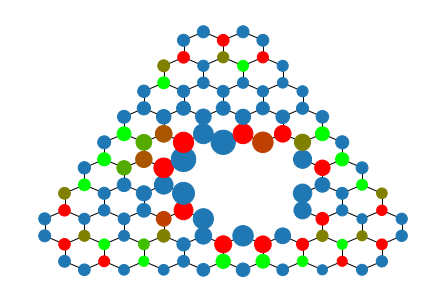

In [37]:
dp.draw_height_path(graph, pos, paths)

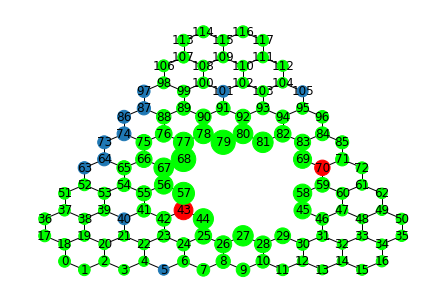

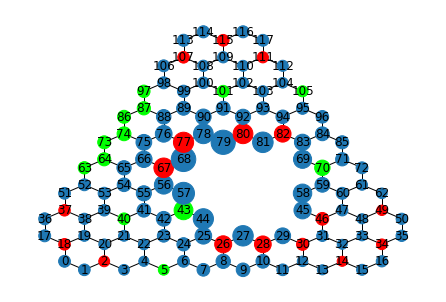

In [38]:
dp.surround_bumps(graph, bumps, level=2, verbose=True, pos=pos);